- **Final Goal:** Increase cumulative profit after brokerage (cum_pub) over days/weeks/months.


- We dont have to forecast prices.

In [1]:
# Read Data
import numpy as np
import pandas as pd

# Visualization

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotly
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode


# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

C:\Users\deepusuresh\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
import os, time
import datetime
import pytz
from datetime import datetime
timezone_str = 'Asia/Kolkata'
localtz = pytz.timezone(timezone_str)

<h2 style="color:blue" align=left> 1. Loading Data </h2>

In [3]:
# Loading Stocks data
stocks = pd.read_csv("stocks_data_2020_till_2020_09_03.csv", skiprows=900000, nrows=1037084)
stocks.columns = ['id','timestamp','open_price','high_price','low_price','close_price','volume','scrip_id']
stocks.head()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id
0,1837649,2020-06-12 10:41:00+05:30,565.85,566.45,565.40,566.45,13906,51
1,1853024,2020-06-12 10:41:00+05:30,465.35,466.10,465.35,465.95,8441,52
2,1868399,2020-06-12 10:41:00+05:30,915.50,916.65,915.50,916.25,4166,53
3,1883774,2020-06-12 10:41:00+05:30,1365.95,1366.80,1365.90,1366.40,944,54
4,1899150,2020-06-12 10:41:00+05:30,2455.40,2456.00,2452.95,2453.65,747,55


In [4]:
stocks.tail()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id
1037079,910769,2020-08-12 09:49:00+05:30,1733.10,1733.95,1731.4,1731.60,2582,54
1037080,926519,2020-08-12 09:49:00+05:30,2882.00,2882.85,2879.0,2879.00,5730,55
1037081,942269,2020-08-12 09:49:00+05:30,11264.65,11266.20,11263.5,11264.65,26775,56
1037082,958019,2020-08-12 09:49:00+05:30,2132.50,2132.50,2131.0,2131.10,49995,57
1037083,973726,2020-08-12 09:49:00+05:30,1270.00,1270.00,1270.0,1270.00,0,58


In [5]:
type(stocks['timestamp'][0])

str

In [6]:
type(stocks['id'][0])

numpy.int64

In [7]:
# Loading Scrip names
scrip = pd.read_csv("scrip_names_till_2020_09_03.csv")
scrip.head()

,id,name,zerodha_id,exchange
0,1,GLENMARK,1895937,NSE
1,2,INDUSINDBK,1346049,NSE
2,3,TECHM,3465729,NSE
3,4,KOTAKBANK,492033,NSE
4,5,RELIANCE,738561,NSE


In [8]:
# Checking size of dataset
display(stocks.shape)
display(scrip.shape)

(1037084, 8)

(66, 4)

In [9]:
display(stocks.info())
display(scrip.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037084 entries, 0 to 1037083
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1037084 non-null  int64  
 1   timestamp    1037084 non-null  object 
 2   open_price   1037084 non-null  float64
 3   high_price   1037084 non-null  float64
 4   low_price    1037084 non-null  float64
 5   close_price  1037084 non-null  float64
 6   volume       1037084 non-null  int64  
 7   scrip_id     1037084 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 63.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          66 non-null     int64 
 1   name        66 non-null     object
 2   zerodha_id  66 non-null     int64 
 3   exchange    66 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


None

In [10]:
stocks = stocks[:500000]

<h2 style="color:blue" align=left> 3. EDA (Exploratory Data Analysis) </h2>

## 1. Name

In [9]:
scrip['name'].nunique()

66

In [10]:
scrip['name'].value_counts()

IOC                  1
HDFC                 1
NIFTY20DEC10000CE    1
RECLTD               1
RELINFRA             1
                    ..
KOTAKBANK            1
ONGC                 1
SUNPHARMA            1
MUTHOOTFIN           1
ITC                  1
Name: name, Length: 66, dtype: int64

## 2. Exchange

In [11]:
scrip['exchange'].nunique()

5

In [12]:
scrip['exchange'].value_counts()

NSE        46
NFO-OPT     8
BSE         5
NFO-FUT     5
INDICES     2
Name: exchange, dtype: int64

## 3. scrip_id

In [13]:
stocks['scrip_id'].nunique()

66

In [14]:
stocks['scrip_id'].value_counts()

2     49381
4     49381
5     49381
1     49380
3     49380
      ...  
38    20685
62    20505
59    20142
66    18727
39    18523
Name: scrip_id, Length: 66, dtype: int64

## 4. scrip : "id"

In [15]:
scrip['id'].nunique()

66

In [16]:
scrip['id'].value_counts()

66    1
17    1
31    1
30    1
29    1
     ..
39    1
38    1
37    1
36    1
1     1
Name: id, Length: 66, dtype: int64

## 5. stocks : "id"

In [17]:
stocks['id'].nunique()

2321232

In [18]:
stocks['id'].value_counts()

2047       1
1798596    1
1769930    1
1776073    1
1774024    1
          ..
834754     1
832707     1
822468     1
820421     1
2049       1
Name: id, Length: 2321232, dtype: int64

## Combine both Dataframes

In [11]:
# Rename column "id" to "scrip_id"
scrip = scrip.rename(columns={"id":"scrip_id"})
scrip.head()

,scrip_id,name,zerodha_id,exchange
0,1,GLENMARK,1895937,NSE
1,2,INDUSINDBK,1346049,NSE
2,3,TECHM,3465729,NSE
3,4,KOTAKBANK,492033,NSE
4,5,RELIANCE,738561,NSE


In [12]:
combine = pd.merge(stocks, scrip, on='scrip_id')
combine.head()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id,name,zerodha_id,exchange
0,1837649,2020-06-12 10:41:00+05:30,565.85,566.45,565.40,566.45,13906,51,HCLTECH,1850625,NSE
1,1837650,2020-06-12 10:42:00+05:30,566.45,567.00,565.90,566.20,11085,51,HCLTECH,1850625,NSE
2,1837651,2020-06-12 10:43:00+05:30,566.55,567.50,566.35,567.20,15100,51,HCLTECH,1850625,NSE
3,1837652,2020-06-12 10:44:00+05:30,567.20,567.40,566.70,567.00,18939,51,HCLTECH,1850625,NSE
4,1837653,2020-06-12 10:45:00+05:30,567.40,567.40,566.30,566.40,12277,51,HCLTECH,1850625,NSE


In [13]:
combine.shape

(500000, 11)

In [14]:
# Check for duplicated values
combine.duplicated().sum()
#combine.drop_duplicates(inplace=True)

0

## Missing Values

In [19]:
display(stocks.isnull().sum())
display(scrip.isnull().sum())

id             0
timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
volume         0
scrip_id       0
dtype: int64

scrip_id      0
name          0
zerodha_id    0
exchange      0
dtype: int64

In [20]:
combine.isnull().sum()

id             0
timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
volume         0
scrip_id       0
name           0
zerodha_id     0
exchange       0
dtype: int64

In [21]:
combine.describe()

,id,open_price,high_price,low_price,close_price,volume,scrip_id,zerodha_id
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,5.000000e+05
mean,7.476586e+05,1609.475397,1610.241675,1608.722276,1609.485786,2.493596e+04,32.901370,1.380411e+07
std,4.795012e+05,4616.830822,4618.341164,4615.366110,4616.864467,7.452813e+04,18.846122,3.478984e+07
min,6.503600e+04,20.100000,20.400000,20.000000,20.150000,0.000000e+00,1.000000,2.650000e+02
25%,3.682878e+05,185.650000,185.800000,185.500000,185.650000,2.250000e+02,17.000000,5.199370e+05
50%,6.807225e+05,536.800000,537.350000,536.250000,536.775000,4.350000e+03,33.000000,2.672641e+06
75%,9.927842e+05,1105.150000,1105.750000,1105.000000,1105.100000,2.115900e+04,49.000000,1.072077e+07
max,2.007040e+06,36826.380000,36827.970000,36807.050000,36824.760000,5.850667e+06,66.000000,1.382843e+08


In [22]:
combine.corr(method='pearson')

,id,open_price,high_price,low_price,close_price,volume,scrip_id,zerodha_id
id,1.000000,0.049210,0.049226,0.049195,0.049210,-0.125826,0.591152,0.098053
open_price,0.049210,1.000000,1.000000,1.000000,1.000000,-0.085369,0.085948,-0.087530
high_price,0.049226,1.000000,1.000000,1.000000,1.000000,-0.085354,0.085944,-0.087543
low_price,0.049195,1.000000,1.000000,1.000000,1.000000,-0.085383,0.085954,-0.087517
close_price,0.049210,1.000000,1.000000,1.000000,1.000000,-0.085368,0.085948,-0.087530
volume,-0.125826,-0.085369,-0.085354,-0.085383,-0.085368,1.000000,-0.211538,-0.109997
scrip_id,0.591152,0.085948,0.085944,0.085954,0.085948,-0.211538,1.000000,0.161549
zerodha_id,0.098053,-0.087530,-0.087543,-0.087517,-0.087530,-0.109997,0.161549,1.000000


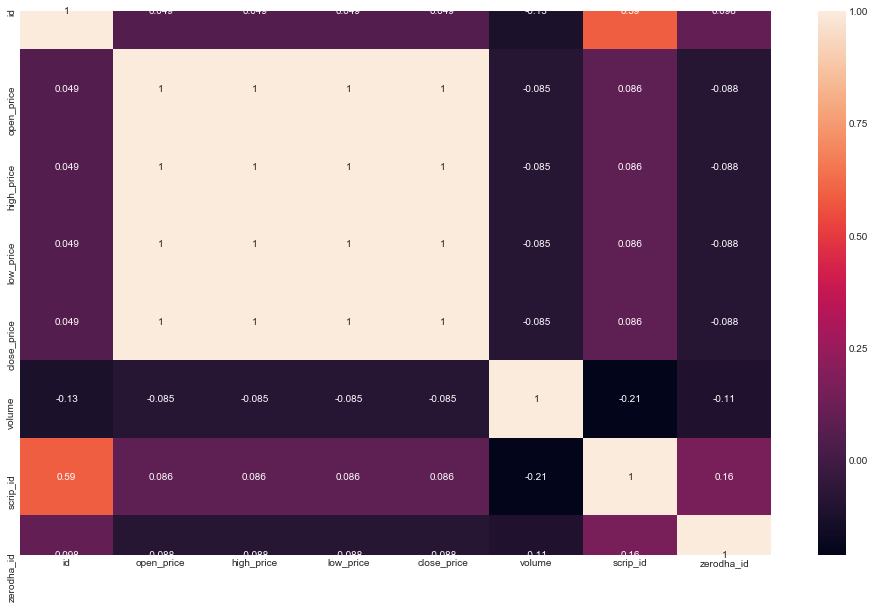

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(combine.corr(), annot=True)

<h2 style="color:blue" align=left> 4. Transaction table / Buy or Sell / Visualisation </h2>

<h3 style="color:green" align=left> 4.1. RELIANCE </h3>

In [15]:
reliance1 = pd.read_csv("stocks_data_2020_till_2020_09_03.csv")
reliance1.head()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id
0,1,2020-02-24 09:15:00+05:30,1170.00,1170.00,1149.25,1164.60,104528,2
1,13008,2020-02-24 09:15:00+05:30,318.00,318.00,311.65,312.30,22036,1
2,26015,2020-02-24 09:15:00+05:30,828.95,828.95,825.45,825.85,22222,3
3,39022,2020-02-24 09:15:00+05:30,1672.00,1672.00,1665.00,1667.10,15844,4
4,52029,2020-02-24 09:15:00+05:30,1469.75,1469.75,1463.10,1465.05,150673,5


In [16]:
def get_stocks_close(stocks, scripid):
    stocks_close = stocks.loc[stocks['scrip_id'] == scripid]

    stocks_close.reset_index(inplace=True)

    stocks_close.drop(['index','id'], axis=1, inplace=True)

    for i in range(len(stocks_close)):
        stocks_close['timestamp'][i] = stocks_close['timestamp'][i][:-6]

    stocks_close['timestamp'] = pd.to_datetime(stocks_close['timestamp'])

    stocks_close.set_index('timestamp',inplace=True)

    return stocks_close

In [17]:
reliance = get_stocks_close(stocks, 5)
print(reliance.shape)
reliance.head()

(7779, 6)


,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-06-12 10:42:00,1532.90,1533.60,1530.45,1530.75,68012,5
2020-06-12 10:43:00,1531.00,1531.45,1529.50,1530.05,33810,5
2020-06-12 10:44:00,1530.00,1530.75,1529.15,1529.15,34734,5
2020-06-12 10:45:00,1529.15,1529.85,1528.05,1528.70,32074,5
2020-06-12 10:46:00,1528.50,1530.25,1528.00,1529.10,63384,5


In [18]:
reliance.tail()

,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-07-10 15:16:00,1876.65,1877.60,1876.00,1877.20,148313,5
2020-07-10 15:17:00,1876.70,1877.50,1876.20,1877.05,85571,5
2020-07-10 15:18:00,1877.15,1877.85,1876.55,1877.10,67329,5
2020-07-10 15:19:00,1877.25,1878.80,1877.00,1878.70,85145,5
2020-07-10 15:20:00,1878.35,1880.20,1877.25,1879.30,165945,5


In [79]:
one = go.Scatter(
      x = reliance.index,
      y = reliance['close_price'],
      name = "Close Price",
      line = dict(color="#17BEcf"),
      opacity = 0.8)

data = [one]

layout = dict(title="Close Price Vs Timestamp : Jun. 12, 2020 - Jul. 10, 2020")

fig = dict(data=data, layout=layout)

iplot(fig, filename="RELIANCE Stock Price")

In [80]:
reliance_2020 = reliance.loc['2020-06-12' : '2020-06-12']

Day = go.Scatter(
      x = reliance_2020.index,
      y = reliance_2020['close_price'],
      name = "Close Price",
      line = dict(color="#17BEcf"),
      opacity = 0.8)

data = [Day]

layout = dict(title="Close Price Vs Timestamp : Jun. 12, 2020 - Jun. 12, 2020")

fig = dict(data=data, layout=layout)

iplot(fig, filename="RELIANCE Stock Price")

<h3 style="color:green" align=left> 4.1.1 Moving Average (Reliance) </h3>

In [81]:
close_price = reliance['close_price']
moving_avg_reliance = close_price.rolling(window=30).mean()

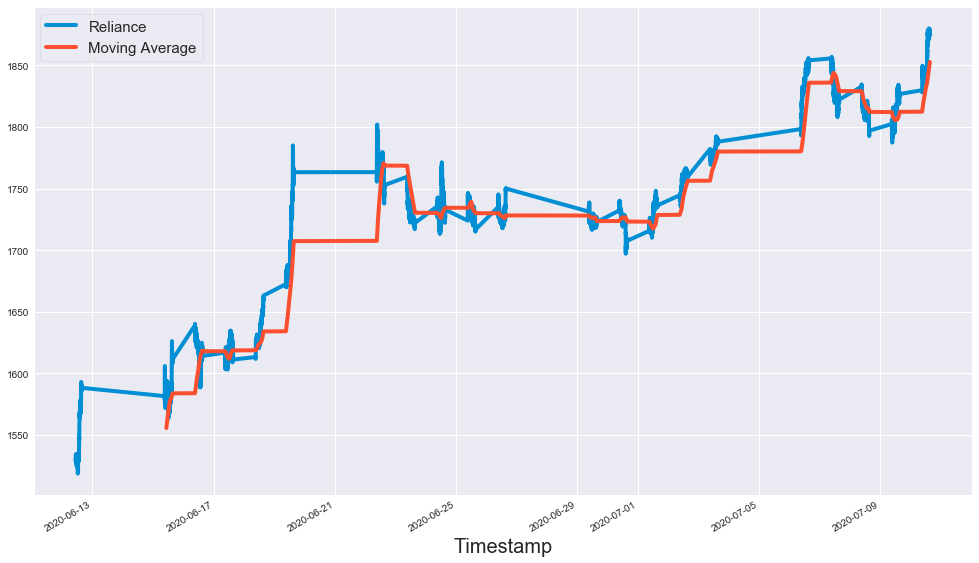

In [29]:
plt.figure(figsize=(15,10))
close_price.plot(label='Reliance')
moving_avg_reliance.plot(label='Moving Average')
plt.xlabel('Timestamp', fontsize=20)
plt.legend(prop={'size': 15})
plt.show()

In [30]:
moving_avg_reliance_MA21 = close_price.rolling(window=21).mean()
moving_avg_reliance_MA9 = close_price.rolling(window=9).mean()

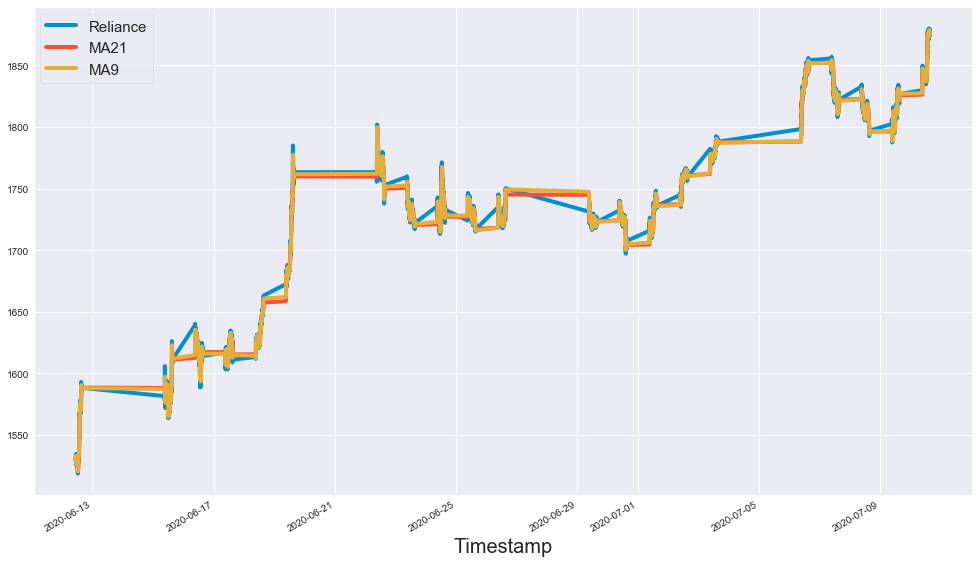

In [31]:
plt.figure(figsize=(15,10))
reliance['close_price'].plot(label='Reliance')
moving_avg_reliance_MA21.plot(label='MA21')
moving_avg_reliance_MA9.plot(label='MA9')
plt.xlabel('Timestamp', fontsize=20)
plt.legend(prop={'size': 15})
plt.show()

<h3 style="color:green" align=left> 4.1.2 Predicting when to buy/sell </h3>

In [32]:
def get_stocks_closeprice(stocks_close, name_of_co):
    stocks_close_co = pd.DataFrame()
    stocks_close_co[name_of_co] = stocks_close['close_price'].values
    return stocks_close_co

stocks_close_rel = get_stocks_closeprice(reliance,"Reliance")
stocks_close_rel.head()

,Reliance
0,1530.75
1,1530.05
2,1529.15
3,1528.70
4,1529.10


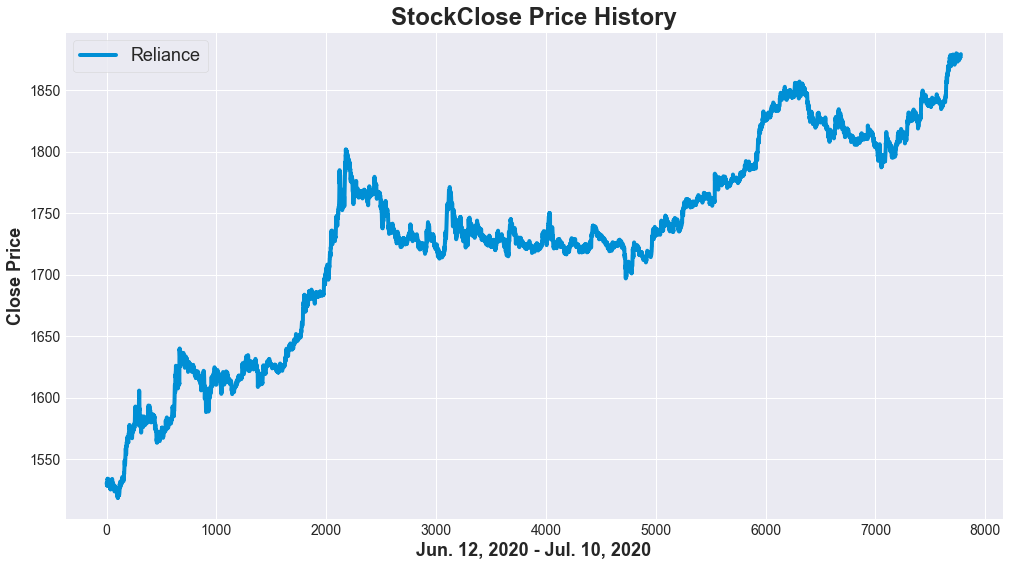

In [33]:
# Plot the Close price for each day
def visual_stock(stocks_close_co):
    
    plt.figure(figsize=(15,9)) 
    
    for c in stocks_close_co.columns.values:
      plt.plot(stocks_close_co[c],  label=c)

    plt.title('StockClose Price History', fontsize=24, fontweight = 'bold')
    plt.xlabel('Jun. 12, 2020 - Jul. 10, 2020', fontsize=18, fontweight = 'bold')
    plt.ylabel('Close Price', fontsize=18, fontweight = 'bold')
    plt.legend(loc='upper left', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

visual_stock(stocks_close_rel)

In [34]:
def get_ma(stocks_close_co, small, large):
    # Create the small simple moving average
    SMA = stocks_close_co.rolling(window=small).mean()

    # Create the long simple moving average
    LMA = stocks_close_co.rolling(window=large).mean()
    return SMA,LMA

SMA,LMA = get_ma(stocks_close_rel,60,180)

In [35]:
def get_ema(stocks_close_co, small, large):
    # Create the small simple moving average
    SEMA = stocks_close_co.ewm(span = small, adjust = False).mean()

    # Create the long simple moving average
    LEMA = df_close_co.ewm(span = large, adjust = False).mean()
    return SEMA,LEMA

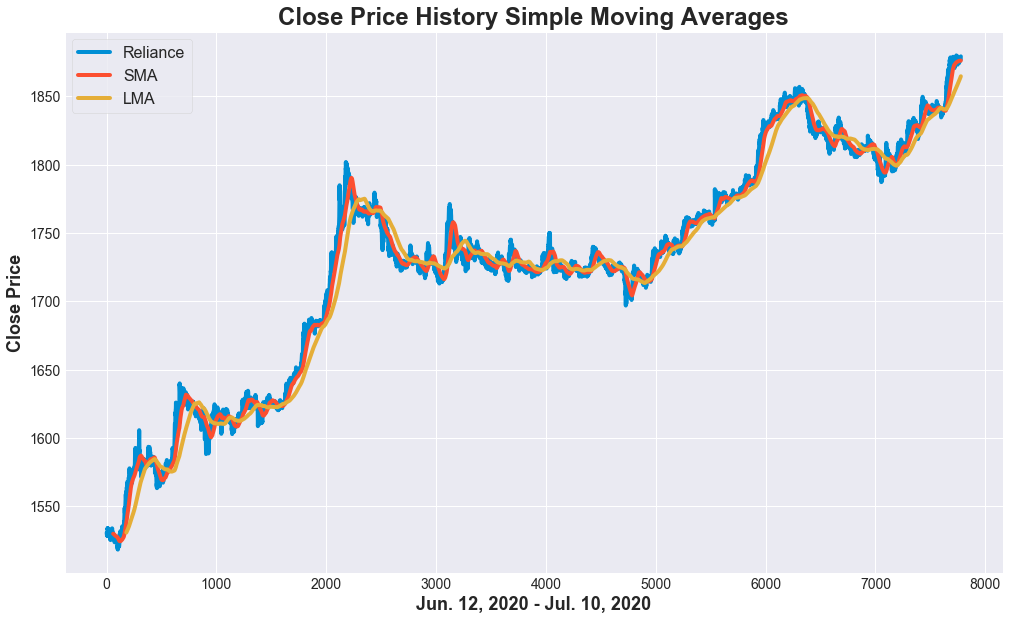

In [36]:
# Visually Show The Stock and The Moving Averages

def visual_movavg(stocks_close_co, co_name):
    plt.figure(figsize=(15,10))
    plt.plot( stocks_close_co[co_name],  label=co_name)
    plt.plot( SMA[co_name],  label='SMA')
    plt.plot( LMA[co_name],  label='LMA')

    plt.title('Close Price History Simple Moving Averages', fontsize=24, fontweight = 'bold')
    plt.xlabel('Jun. 12, 2020 - Jul. 10, 2020', fontsize=18, fontweight = 'bold')
    plt.ylabel('Close Price', fontsize=18, fontweight = 'bold')
    plt.legend( loc='upper left', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

visual_movavg(stocks_close_rel,"Reliance")

In [37]:
# Function to signal when to buy and sell an asset

def buy_sell(signal,co_name):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    cycle=0    
    for i in range(0,len(signal)):
        #if SMA > LMA  then buy else sell
        if signal['SMA'][i] > signal['LMA'][i]:
            if flag != 1:
                sigPriceBuy.append(signal[co_name][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
                #print('Buy')
        elif signal['SMA'][i] < signal['LMA'][i]:
                if flag != 0:
                    sigPriceSell.append(signal[co_name][i])
                    sigPriceBuy.append(np.nan)
                    flag = 0
                else:
                    sigPriceBuy.append(np.nan)
                    sigPriceSell.append(np.nan)
                    #print('sell')
        else: #Handling nan values
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell)

In [38]:
# get signal df i.e df telling when to buy/sel

def get_signal(stocks_close_co, co_name, SMA, LMA):
    signal = pd.DataFrame(index=stocks_close_co[co_name].index)
    signal[co_name] = stocks_close_co[co_name]
    
    signal['SMA'] = SMA[co_name]
    signal['LMA'] = LMA[co_name]
    
    x = buy_sell(signal, co_name)
    signal['Buy_Signal_Price'] = x[0]
    signal['Sell_Signal_Price'] = x[1]
    
    return signal

signal = get_signal(stocks_close_rel, "Reliance", SMA, LMA)
signal.head()    

,Reliance,SMA,LMA,Buy_Signal_Price,Sell_Signal_Price
0,1530.75,NaN,NaN,NaN,NaN
1,1530.05,NaN,NaN,NaN,NaN
2,1529.15,NaN,NaN,NaN,NaN
3,1528.70,NaN,NaN,NaN,NaN
4,1529.10,NaN,NaN,NaN,NaN


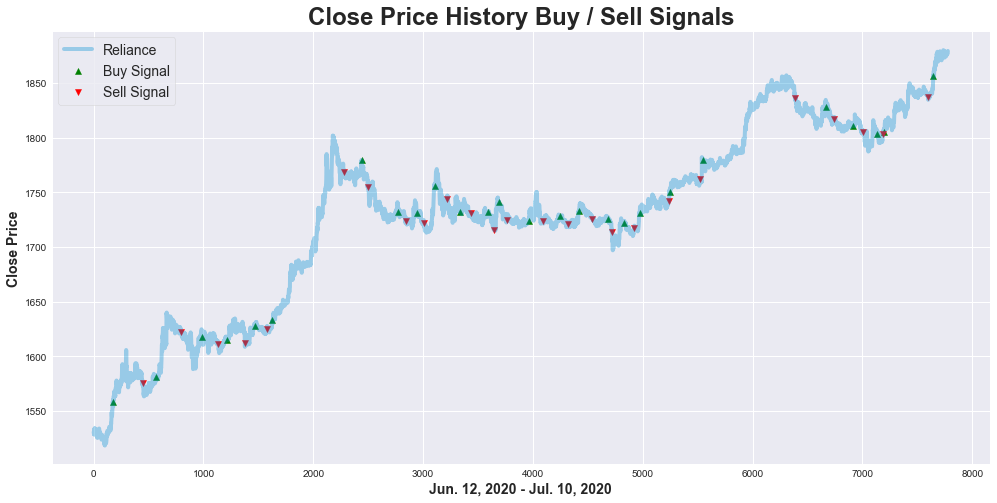

In [39]:
# Visually Show The Stock buy and sell signals

def visual_signal(signal,co_name):
    my_stocks = signal
    ticker = co_name

    plt.figure(figsize=(15,8)) 
    plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
    plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
    plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)
    plt.title('Close Price History Buy / Sell Signals', fontsize=24, fontweight = 'bold')
    plt.xlabel('Jun. 12, 2020 - Jul. 10, 2020', fontsize=14, fontweight = 'bold')
    plt.ylabel('Close Price', fontsize=14, fontweight = 'bold')
    plt.legend( loc='upper left', fontsize=14)
    plt.show()

visual_signal(signal,"Reliance")

<h3 style="color:green" align=left> 4.1.3 Transaction Table </h3>

In [40]:
BROKERAGES = {
    "zerodha": {
        "intraday": {
            "buy": {
                "base": 0.0003,
                "stt": 0,
                "exchange txn charges": 0.0000325,
                "gst": 0.00006,
                "sebi": 0.0000005,
                "stamp duty": 0.00003
            },
            "sell": {
                "base": 0.0003,
                "stt": 0.00025,
                "exchange txn charges": 0.0000325,
                "gst": 0.00006,
                "sebi": 0.0000005,
                "stamp duty": 0
            }
        }
    }
}

In [41]:
def calculate_brokerage(side, txn_type, price, broker):
    current_brokerages_dict = BROKERAGES[broker][txn_type]
    brokerages = 0
    for head, value in current_brokerages_dict[side].items():
        brokerages += price*value
    return brokerages

In [42]:
# get transaction table

def get_transctable(df_co,signal):
    transaction_df = pd.DataFrame(columns=
                              [
                               'scrip',
                               'timestamp',
                               'buy/sell',
                               'price',
                               'brokerage',
                               'qtystock',
                               'profit',
                               'cum_profit',
                               'pab',
                               'cum_pab',
                              ]
                             ) 
    # setting up intial cols.
    transaction_df['timestamp'] = df_co.index

    transaction_df['scrip'] = df_co['scrip_id'].values

    transaction_df['price'] = df_co['close_price'].values


    transaction_df.loc[signal['Buy_Signal_Price'].notnull(),"buy/sell"] = 'buy'

    transaction_df.loc[signal['Sell_Signal_Price'].notnull(),"buy/sell"] = 'sell'



    transaction_df = transaction_df[transaction_df['buy/sell'].notnull()]

    transaction_df.reset_index(inplace=True)
    transaction_df.drop(['index'],axis=1,inplace=True)
    
    transaction_df['qtystock'] = 0


    for i in range(0,len(transaction_df)):
        # for creating brokerage col.
        transaction_df['brokerage'][i] = calculate_brokerage(transaction_df['buy/sell'][i],
                                                             'intraday',
                                                            transaction_df['price'][i],
                                                             'zerodha')

        # for creating qty col.
        if i>0:
            transaction_df['qtystock'][i] = transaction_df['qtystock'][i-1]
        if transaction_df['buy/sell'][i] == 'buy':
            transaction_df['qtystock'][i] = transaction_df['qtystock'][i]+1
        else:
            transaction_df['qtystock'][i] = transaction_df['qtystock'][i]-1

        # for creating profit col
        if (i%2 != 0):
            if transaction_df['buy/sell'][i] == 'sell':
                transaction_df['profit'][i] = transaction_df['price'][i] - transaction_df["price"][i-1]
            else:
                transaction_df['profit'][i] = transaction_df['price'][i-1] - transaction_df["price"][i]
        else:
            transaction_df['profit'][i] = 0


    transaction_df['cum_profit'] = 0.0
    transaction_df['pab'] = 0.0
    transaction_df['cum_pab'] = 0.0

    # for creating cum_profit col.
    for i in range(1,len(transaction_df)):
        transaction_df['cum_profit'][i] = transaction_df['cum_profit'][i-1] + transaction_df['profit'][i]

    # for creating pab col.   
    transaction_df['pab'] = transaction_df['profit'] - transaction_df['brokerage']

    # for creating cum_pab col.
    transaction_df['cum_pab'][0] = transaction_df['pab'][0]
    for i in range(1,len(transaction_df)):
        transaction_df['cum_pab'][i] = transaction_df['cum_pab'][i-1] + transaction_df['pab'][i]
    
    return transaction_df

In [43]:
transaction_df = get_transctable(reliance, signal)
transaction_df

,scrip,timestamp,buy/sell,price,brokerage,qtystock,profit,cum_profit,pab,cum_pab
0,5,2020-06-12 13:41:00,buy,1558.60,0.659288,1,0,0.00,-0.659288,-0.659288
1,5,2020-06-15 11:53:00,sell,1575.20,1.01285,0,16.6,16.60,15.5871,14.927859
2,5,2020-06-15 13:57:00,buy,1581.00,0.668763,1,0,16.60,-0.668763,14.259096
3,5,2020-06-16 11:31:00,sell,1622.00,1.04295,0,41,57.60,39.9571,54.216150
4,5,2020-06-16 14:40:00,buy,1618.00,0.684414,1,0,57.60,-0.684414,53.531736
5,5,2020-06-17 10:45:00,sell,1611.00,1.03587,0,-7,50.60,-8.03587,45.495863
6,5,2020-06-17 12:15:00,buy,1615.40,0.683314,1,0,50.60,-0.683314,44.812548
7,5,2020-06-17 14:59:00,sell,1612.00,1.03652,0,-3.4,47.20,-4.43652,40.376032
8,5,2020-06-18 10:13:00,buy,1628.05,0.688665,1,0,47.20,-0.688665,39.687367
9,5,2020-06-18 11:58:00,sell,1624.90,1.04481,0,-3.15,44.05,-4.19481,35.492557


<h3 style="color:green" align=left> 4.2 INDUSINDBK </h3>

In [60]:
INDUSINDBK = get_stocks_close(stocks, 2)
print(INDUSINDBK.shape)
INDUSINDBK.head()

(7779, 6)


,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-06-12 10:42:00,492.85,493.20,492.50,492.90,82581,2
2020-06-12 10:43:00,492.90,493.05,492.20,492.70,52121,2
2020-06-12 10:44:00,492.95,493.00,492.45,492.85,58177,2
2020-06-12 10:45:00,492.90,492.95,492.10,492.15,35640,2
2020-06-12 10:46:00,492.30,492.40,491.25,491.65,56398,2


In [61]:
INDUSINDBK.tail()

,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-07-10 15:16:00,538.15,538.60,536.55,537.50,197918,2
2020-07-10 15:17:00,537.60,538.50,537.10,538.20,90304,2
2020-07-10 15:18:00,538.45,540.85,538.10,540.35,260815,2
2020-07-10 15:19:00,540.35,540.65,538.55,539.20,131566,2
2020-07-10 15:20:00,539.20,540.00,539.05,539.05,70185,2


In [63]:
start_remove = pd.Timestamp('2020-06-16 10:05:00')
end_remove = pd.Timestamp('2020-06-16 10:40:00')

INDUSINDBK = INDUSINDBK.loc[~INDUSINDBK.index.isin(INDUSINDBK.index[INDUSINDBK.index.slice_indexer(start_remove, end_remove)])]

INDUSINDBK.shape

(7743, 6)

In [66]:
stocks_close_ind = get_stocks_closeprice(INDUSINDBK,"Indusind")
stocks_close_ind.head()

,Indusind
0,492.90
1,492.70
2,492.85
3,492.15
4,491.65


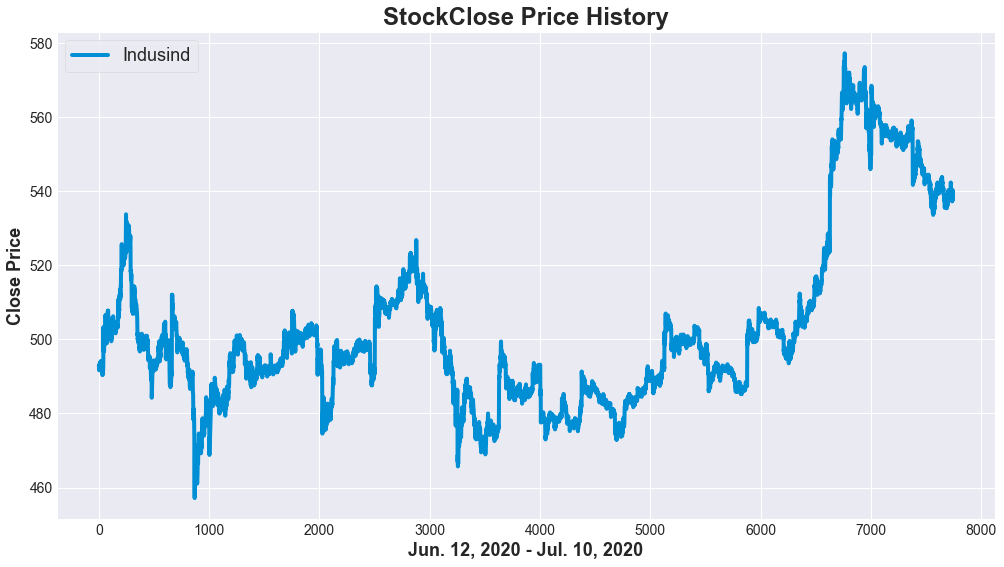

In [67]:
visual_stock(stocks_close_ind)

In [68]:
SMA,LMA = get_ma(stocks_close_ind,33,99)

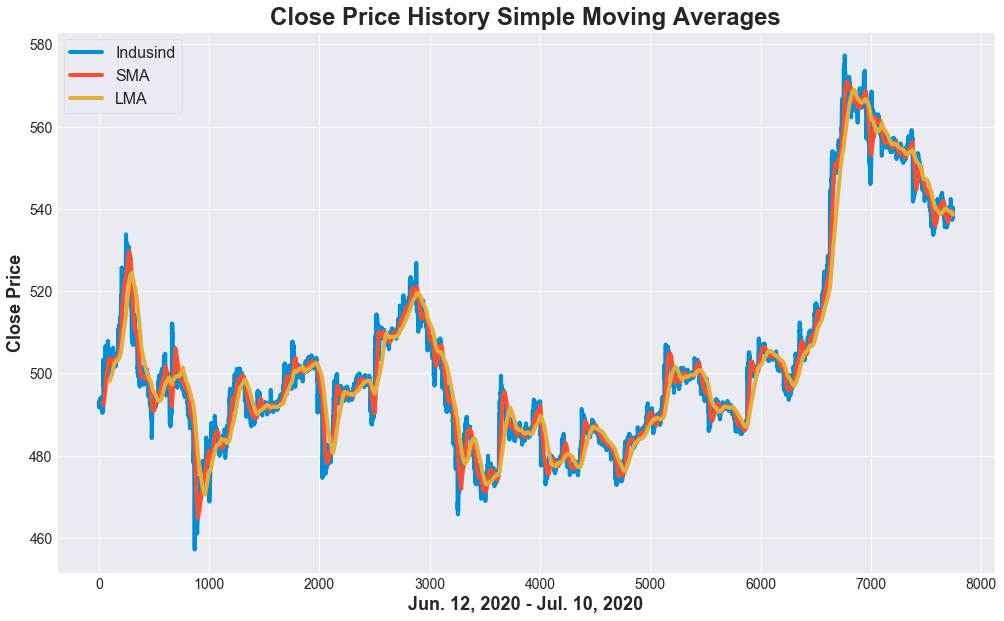

In [69]:
visual_movavg(stocks_close_ind,'Indusind')

In [70]:
signal_ind = get_signal(stocks_close_ind,"Indusind",SMA,LMA)
signal_ind.head()

,Indusind,SMA,LMA,Buy_Signal_Price,Sell_Signal_Price
0,492.90,NaN,NaN,NaN,NaN
1,492.70,NaN,NaN,NaN,NaN
2,492.85,NaN,NaN,NaN,NaN
3,492.15,NaN,NaN,NaN,NaN
4,491.65,NaN,NaN,NaN,NaN


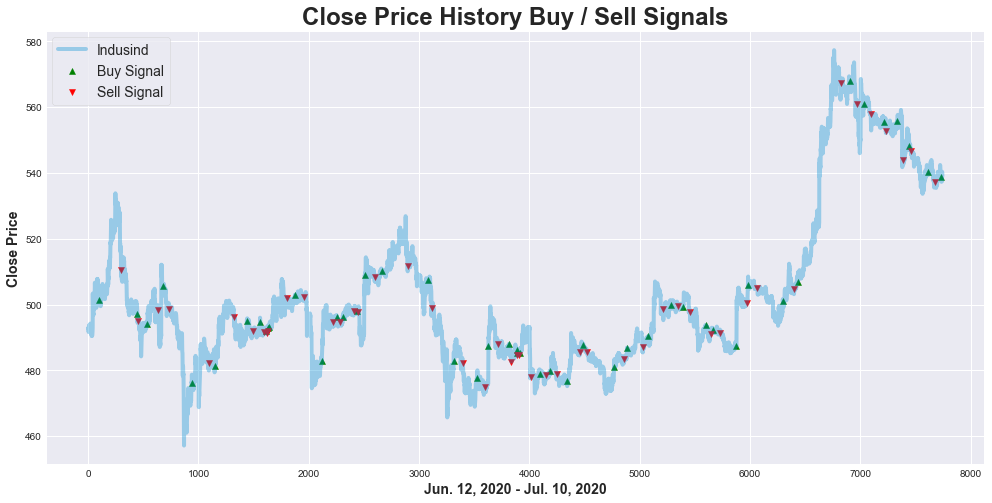

In [71]:
visual_signal(signal_ind,"Indusind")

In [72]:
transaction_indu = get_transctable(INDUSINDBK, signal_ind)
transaction_indu

,scrip,timestamp,buy/sell,price,brokerage,qtystock,profit,cum_profit,pab,cum_pab
0,2,2020-06-12 12:20:00,buy,501.45,0.212113,1,0,0.00,-0.212113,-0.212113
1,2,2020-06-15 09:25:00,sell,510.55,0.328284,0,9.1,9.10,8.77172,8.559603
2,2,2020-06-15 11:53:00,buy,497.20,0.210316,1,0,9.10,-0.210316,8.349287
3,2,2020-06-15 11:58:00,sell,494.85,0.318189,0,-2.35,6.75,-2.66819,5.681099
4,2,2020-06-15 13:22:00,buy,494.00,0.208962,1,0,6.75,-0.208962,5.472137
...,...,...,...,...,...,...,...,...,...,...
90,2,2020-07-10 10:21:00,buy,548.25,0.23191,1,0,74.55,-0.23191,50.363452
91,2,2020-07-10 10:39:00,sell,546.60,0.351464,0,-1.65,72.90,-2.00146,48.361989
92,2,2020-07-10 13:06:00,buy,540.25,0.228526,1,0,72.90,-0.228526,48.133463
93,2,2020-07-10 14:10:00,sell,537.35,0.345516,0,-2.9,70.00,-3.24552,44.887947


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

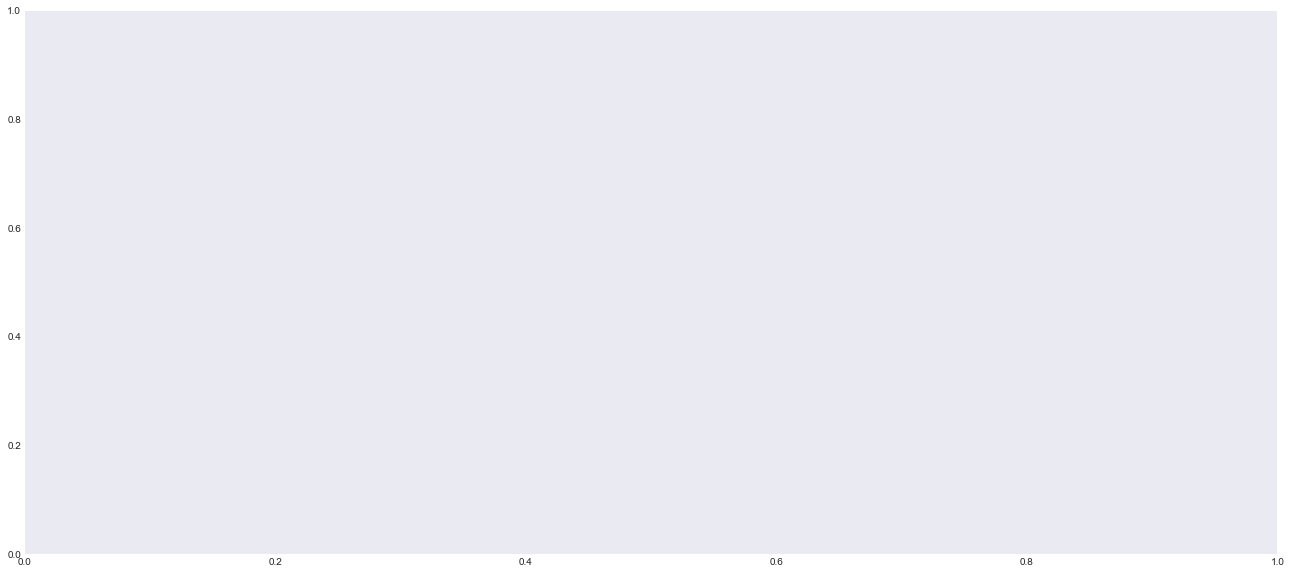

In [73]:
cum_pab_dict = dict(zip(transaction_indu.timestamp, transaction_indu.cum_pab))

keys = cum_pab_dict.keys()
values = cum_pab_dict.values()

plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x=list(cum_pab_dict.keys()), height=cum_pab_dict.values())
ax.set_title(f'Cumulative Profits after Brokerage for selected days.',
fontdict={'size': 24, 'weight': 'bold'}, pad=0.5)
ax.set_xlabel('Days', fontdict={'size': 18})
ax.set_ylabel('Cumulative Profit after Brokerage', fontdict={'size': 18})

<h3 style="color:green" align=left> 4.3 GLENMARK </h3>

In [44]:
GLENMARK = get_stocks_close(stocks, 1)
print(GLENMARK.shape)
GLENMARK.head()

(7779, 6)


,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-06-12 10:42:00,391.45,391.7,391.20,391.55,9046,1
2020-06-12 10:43:00,391.55,392.4,391.15,391.85,26681,1
2020-06-12 10:44:00,391.85,392.5,391.65,392.20,18136,1
2020-06-12 10:45:00,392.30,392.3,390.60,391.35,11137,1
2020-06-12 10:46:00,391.35,391.5,391.00,391.00,6472,1


In [45]:
GLENMARK.tail()

,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-07-10 15:16:00,426.8,427.0,426.10,426.70,27988,1
2020-07-10 15:17:00,426.7,427.5,426.70,427.25,20960,1
2020-07-10 15:18:00,427.3,427.3,426.55,426.65,12400,1
2020-07-10 15:19:00,426.8,427.5,426.50,427.45,14131,1
2020-07-10 15:20:00,427.5,427.5,427.05,427.05,19344,1


In [46]:
start_remove = pd.Timestamp('2020-06-16 10:05:00')
end_remove = pd.Timestamp('2020-06-16 10:40:00')

GLENMARK = GLENMARK.loc[~GLENMARK.index.isin(GLENMARK.index[GLENMARK.index.slice_indexer(start_remove, end_remove)])]

GLENMARK.shape

(7743, 6)

In [51]:
stocks_close_glen = get_stocks_closeprice(GLENMARK,"Glenmark")
stocks_close_glen.head()

,Glenmark
0,391.55
1,391.85
2,392.20
3,391.35
4,391.00


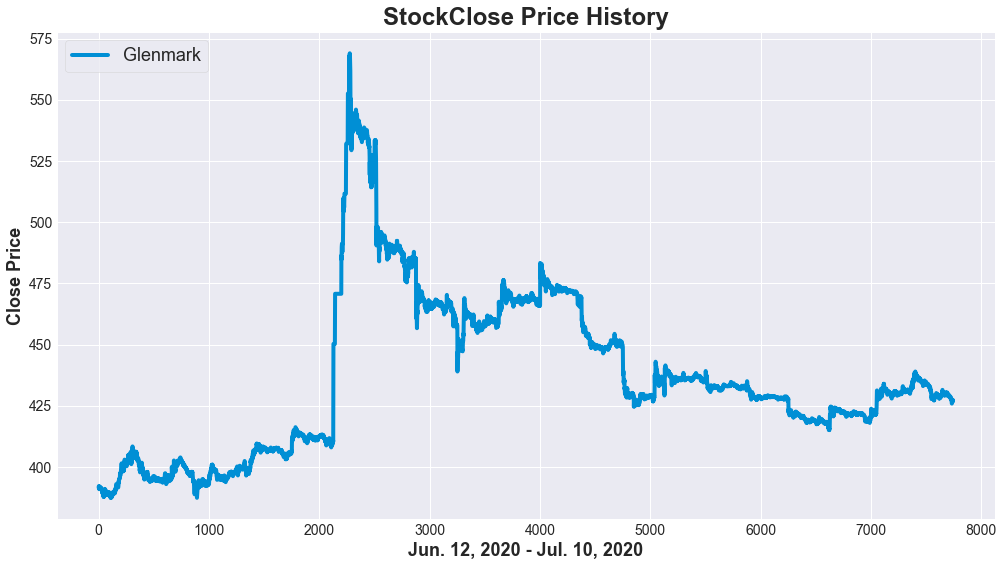

In [52]:
visual_stock(stocks_close_glen)

In [53]:
SMA,LMA = get_ma(stocks_close_glen,33,99)

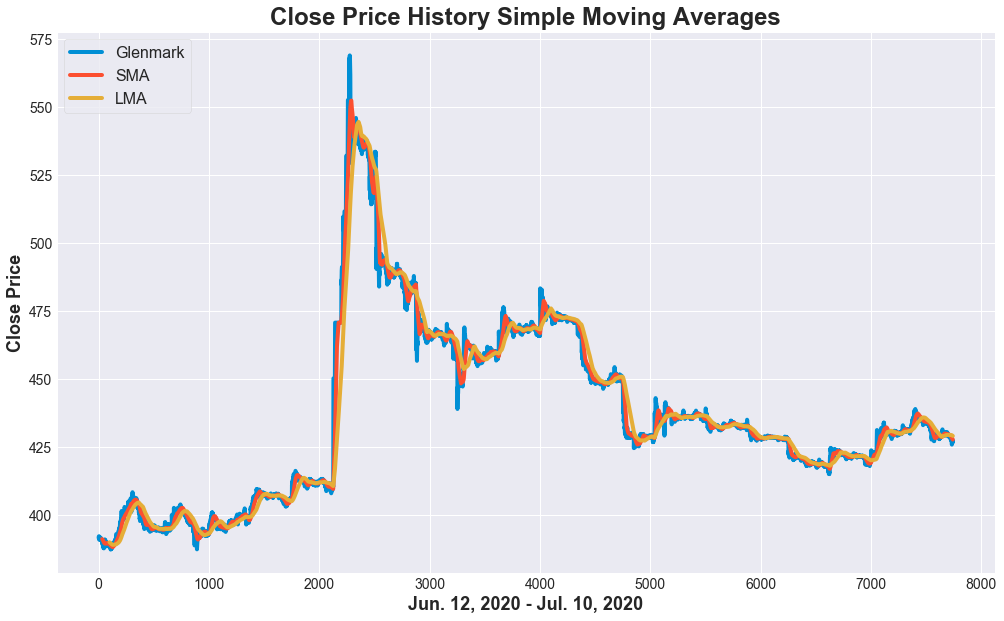

In [54]:
visual_movavg(stocks_close_glen,'Glenmark')

In [55]:
signal_glen = get_signal(stocks_close_glen,"Glenmark",SMA,LMA)
signal_glen.head()

,Glenmark,SMA,LMA,Buy_Signal_Price,Sell_Signal_Price
0,391.55,NaN,NaN,NaN,NaN
1,391.85,NaN,NaN,NaN,NaN
2,392.20,NaN,NaN,NaN,NaN
3,391.35,NaN,NaN,NaN,NaN
4,391.00,NaN,NaN,NaN,NaN


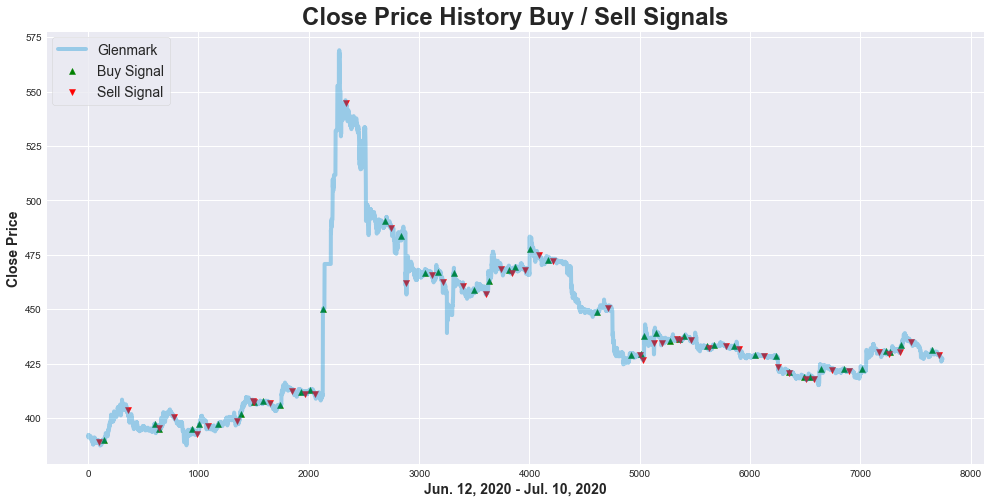

In [56]:
visual_signal(signal_glen,"Glenmark")

In [58]:
transaction_glen = get_transctable(GLENMARK, signal_glen)
transaction_glen

,scrip,timestamp,buy/sell,price,brokerage,qtystock,profit,cum_profit,pab,cum_pab
0,1,2020-06-12 12:20:00,sell,388.70,0.249934,-1,0,0.00,-0.249934,-0.249934
1,1,2020-06-12 13:10:00,buy,389.80,0.164885,0,-1.1,-1.10,-1.26489,-1.514820
2,1,2020-06-15 10:25:00,sell,403.65,0.259547,-1,0,-1.10,-0.259547,-1.774366
3,1,2020-06-15 14:29:00,buy,397.40,0.1681,0,6.25,5.15,6.0819,4.307533
4,1,2020-06-15 15:06:00,sell,395.35,0.25421,-1,0,5.15,-0.25421,4.053323
...,...,...,...,...,...,...,...,...,...,...
90,1,2020-07-09 15:09:00,sell,430.50,0.276811,-1,0,22.85,-0.276811,1.782849
91,1,2020-07-09 15:19:00,buy,433.30,0.183286,0,-2.8,20.05,-2.98329,-1.200437
92,1,2020-07-10 10:38:00,sell,435.00,0.279705,-1,0,20.05,-0.279705,-1.480142
93,1,2020-07-10 13:45:00,buy,431.25,0.182419,0,3.75,23.80,3.56758,2.087439
